## Krzywa nad ciałem GF(7)

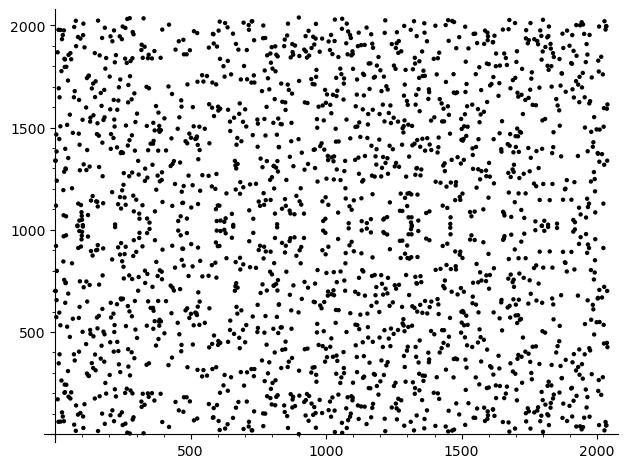

In [24]:

sage: G = GF(2^11-9)
sage: Ef = EllipticCurve(G, [-4,2])

sage: pl = plot(Ef, rgbcolor=(0,0,0))
pl